In [1]:
from datetime import datetime
from collections import defaultdict
import re
import pickle
import pandas as pd
from netCDF4 import Dataset, num2date #pylint: disable=no-name-in-module
import numpy as np
import numpy.ma as ma
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import scipy.optimize as opt
from scipy.stats import linregress
import seaborn as sn
import cmasher as cmr
import mpl_axes_aligner


from functions_summary import *
from pickling import get_all_stats

In [2]:
path_forcing_era5 = '/home/vpo001/storage/bc/all_years/final_forcing/scaled_era5_all.nc'
path_forcing_jra55 = '/home/vpo001/storage/bc/all_years/final_forcing/scaled_merra2_all.nc'
path_forcing_merra2 = '/home/vpo001/storage/bc/all_years/final_forcing/scaled_jra55_all.nc'
path_ground = '/home/vpo001/storage/bc/all_years/niagara_results/result_soil_temperature.nc'
path_snow = '/home/vpo001/storage/bc/all_years/niagara_results/result_snow_depth.nc'
path_swe = '/home/vpo001/storage/bc/all_years/niagara_results/result_swe.nc'
path_thaw_depth = '/home/vpo001/storage/bc/all_years/niagara_results/result_thaw_depth.nc'
path_repository = '/home/vpo001/storage/bc/all_years/niagara_results/folder_manifest.csv'
site = 'Joffre_new'
year_bkg_end = 2000
year_trans_end = 2020
forcing_list = ['era5', 'jra55', 'merra2']
path_forcing_list = [path_forcing_era5, path_forcing_jra55, path_forcing_merra2]
no_weight = True
consecutive = 7
glacier = False
min_glacier_depth = 100

In [3]:
df, reanalysis_stats, list_valid_sim, dict_melt_out, stats_melt_out_dic, df_stats = get_all_stats(forcing_list, path_forcing_list, path_repository, path_ground, path_snow,
                                                                                                  year_bkg_end, year_trans_end, consecutive, site,
                                                                                                  glacier, min_glacier_depth)

All good, same order for all lists!
Created a new pickle: df_Joffre_new.pkl
Created a new pickle: reanalysis_stats_Joffre_new.pkl
Created a new pickle: list_valid_sim_Joffre_new.pkl
Created a new pickle: melt_out_Joffre_new.pkl
Created a new pickle: df_stats_Joffre_new.pkl


In [4]:
df, reanalysis_stats, list_valid_sim, dict_melt_out, stats_melt_out_dic, df_stats = load_all_pickles(site)

Succesfully opened the pre-existing pickle: df_Joffre_new.pkl
Succesfully opened the pre-existing pickle: reanalysis_stats_Joffre_new.pkl
Succesfully opened the pre-existing pickle: list_valid_sim_Joffre_new.pkl
Succesfully opened the pre-existing pickle: melt_out_Joffre_new.pkl
Succesfully opened the pre-existing pickle: df_stats_Joffre_new.pkl


Succesfully opened the pre-existing pickle: df_Joffre_new.pkl
Succesfully opened the pre-existing pickle: reanalysis_stats_Joffre_new.pkl
Succesfully opened the pre-existing pickle: list_valid_sim_Joffre_new.pkl
Succesfully opened the pre-existing pickle: melt_out_Joffre_new.pkl
Succesfully opened the pre-existing pickle: df_stats_Joffre_new.pkl
The following plot is a histogram of the distribution of the statistical weights of all simulations:


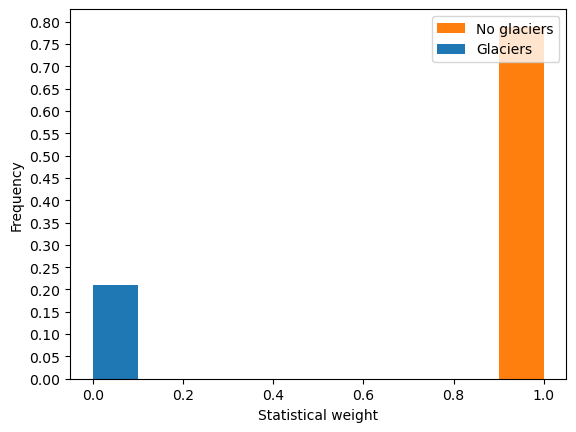

The following plot is a histogram of the distribution of glacier simulations wrt to altitude, aspect, slope, and forcing:
[52 92 72]
[33 31 26 23 22 23 26 32]
[ 8 29 68 52 59]
[76 71 69]


<Figure size 640x480 with 0 Axes>

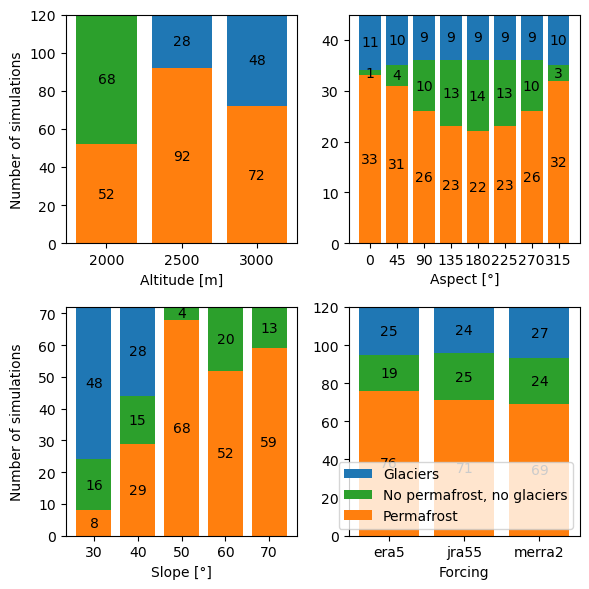

List of altitudes: [2000, 2500, 3000]
Altitude at which we plot the time series: 2500
List of altitudes: [2000, 2500, 3000]
Altitude at which we plot the time series: 2500
Plots of the normalized distance of air and ground temperature, water production, and thaw_depth as a function of time
Granularity: week and month side by side


<Figure size 640x480 with 0 Axes>

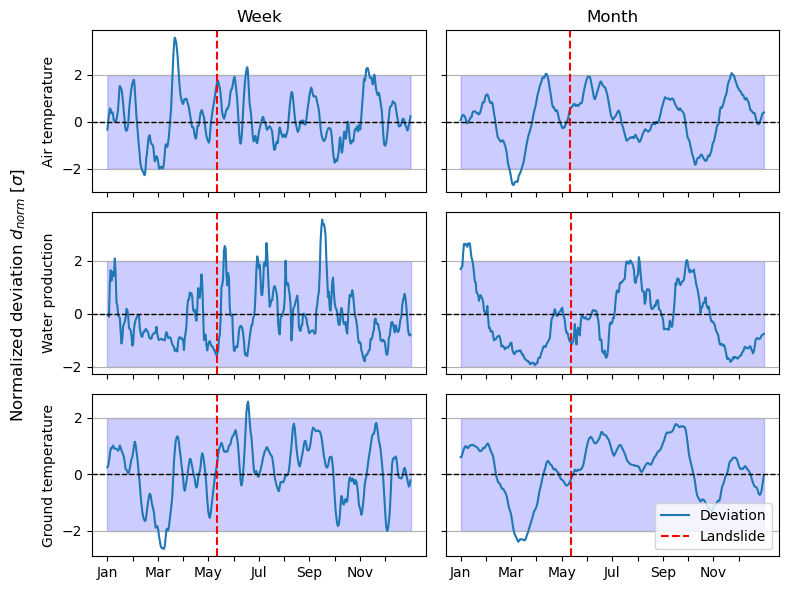

Granularity: year, plotted for all years


<Figure size 640x480 with 0 Axes>

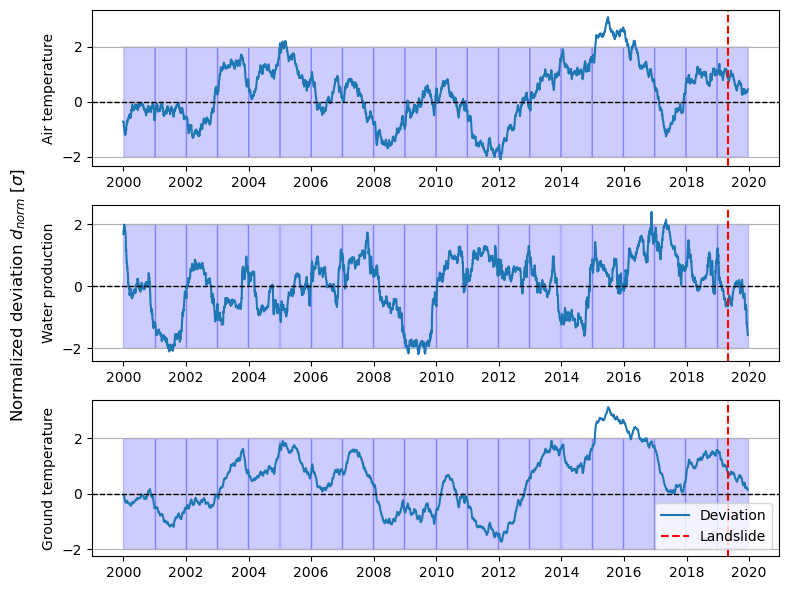

Yearly statistics for air and ground surface temperature, and also precipitation and water production


<Figure size 640x480 with 0 Axes>

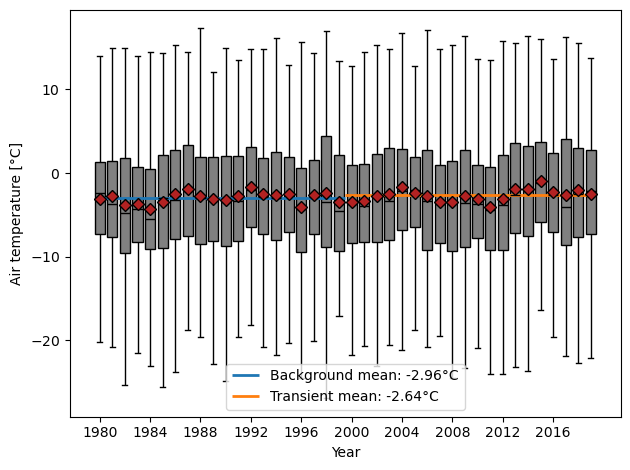

<Figure size 640x480 with 0 Axes>

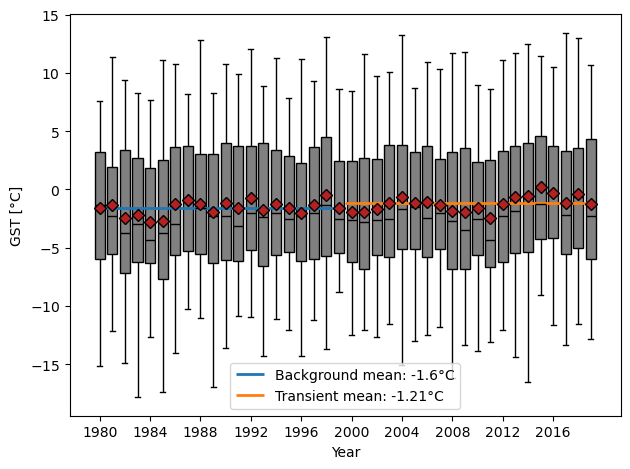

<Figure size 640x480 with 0 Axes>

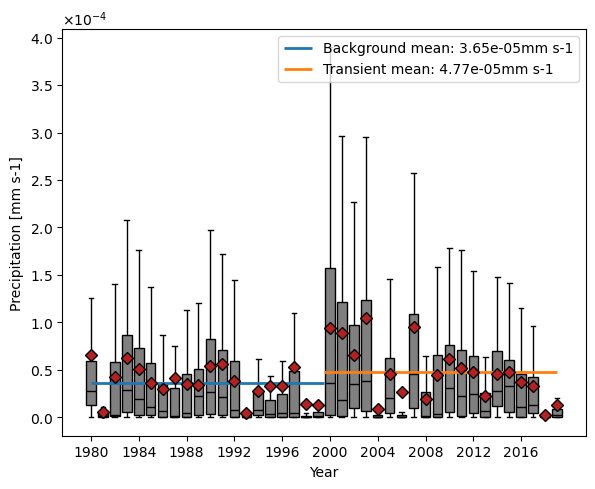

<Figure size 640x480 with 0 Axes>

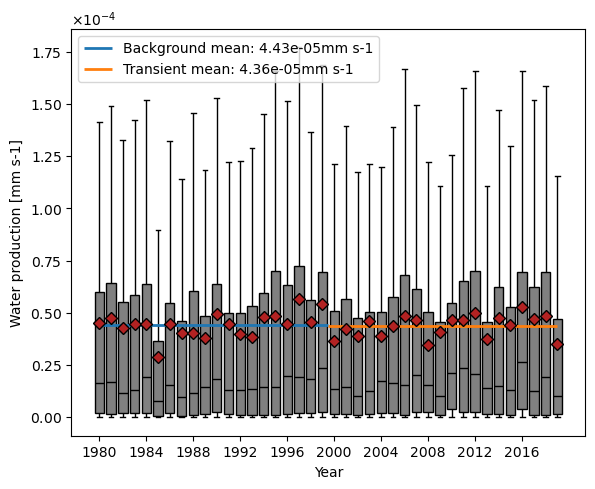

Heatmap of the background mean GST and its evolution as a function of aspect and slope at all altitude
Succesfully opened the pre-existing pickle: df_Joffre_new.pkl
Succesfully opened the pre-existing pickle: reanalysis_stats_Joffre_new.pkl
Succesfully opened the pre-existing pickle: list_valid_sim_Joffre_new.pkl
Succesfully opened the pre-existing pickle: melt_out_Joffre_new.pkl
Succesfully opened the pre-existing pickle: df_stats_Joffre_new.pkl


/fs/yedoma/home/vpo001/.conda/envs/victorconda/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/fs/yedoma/home/vpo001/.conda/envs/victorconda/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<Figure size 640x480 with 0 Axes>

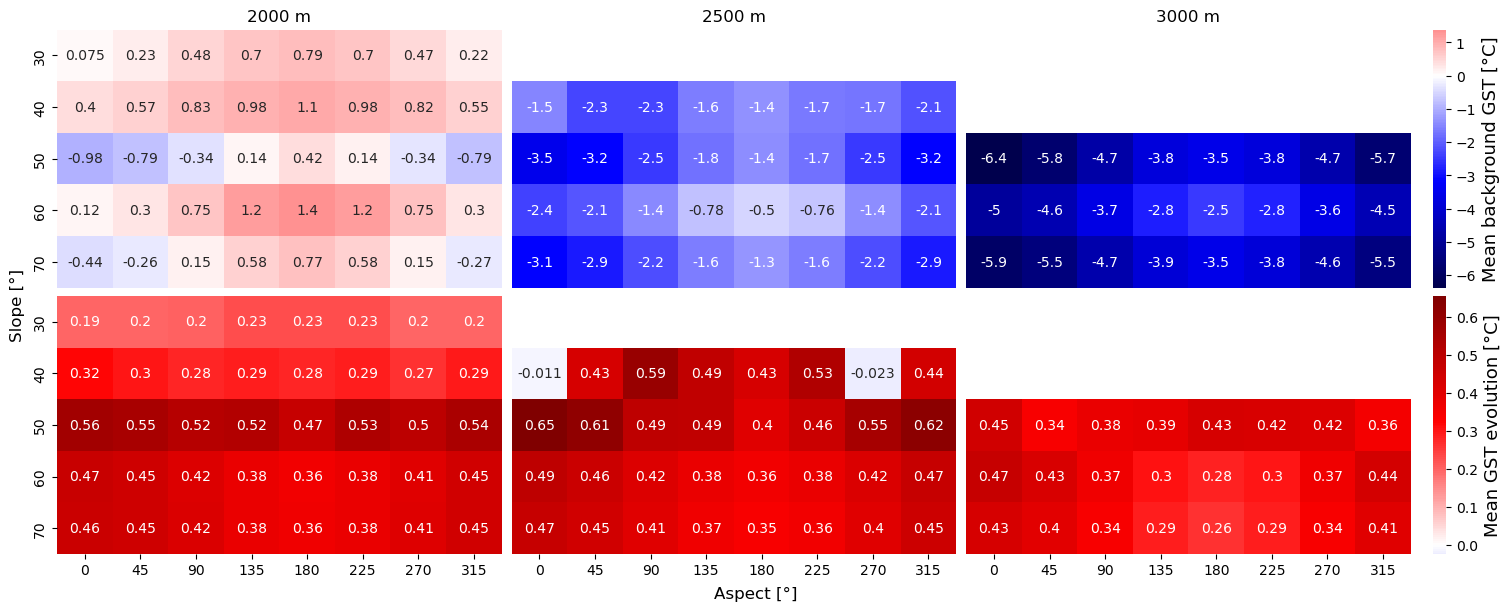

CDF of background, transient, and evolution GST:
Succesfully opened the pre-existing pickle: df_Joffre_new.pkl
Succesfully opened the pre-existing pickle: reanalysis_stats_Joffre_new.pkl
Succesfully opened the pre-existing pickle: list_valid_sim_Joffre_new.pkl
Succesfully opened the pre-existing pickle: melt_out_Joffre_new.pkl
Succesfully opened the pre-existing pickle: df_stats_Joffre_new.pkl


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

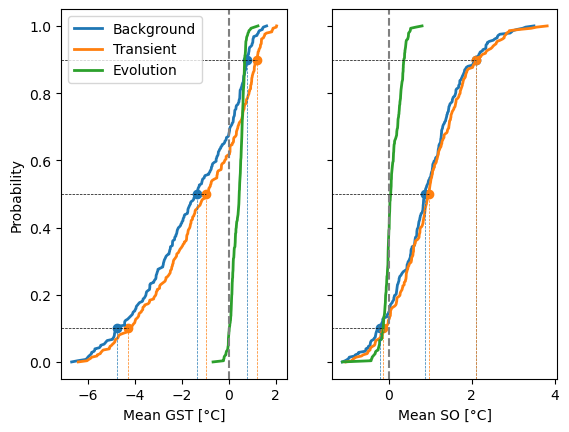

Heatmap of 10th, 25th, 50th, 75th, and 90th percentile in background and transient GST, and the difference:


/fs/yedoma/home/vpo001/.conda/envs/victorconda/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/fs/yedoma/home/vpo001/.conda/envs/victorconda/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


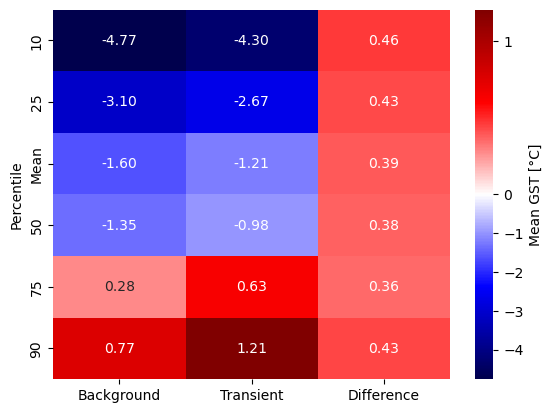

Plot of mean GST evolution vs background GST, with an emphasis on the 10% colder and warmer simulations
Succesfully opened the pre-existing pickle: df_Joffre_new.pkl
Succesfully opened the pre-existing pickle: reanalysis_stats_Joffre_new.pkl
Succesfully opened the pre-existing pickle: list_valid_sim_Joffre_new.pkl
Succesfully opened the pre-existing pickle: melt_out_Joffre_new.pkl
Succesfully opened the pre-existing pickle: df_stats_Joffre_new.pkl


/fs/yedoma/home/vpo001/.conda/envs/victorconda/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/fs/yedoma/home/vpo001/.conda/envs/victorconda/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


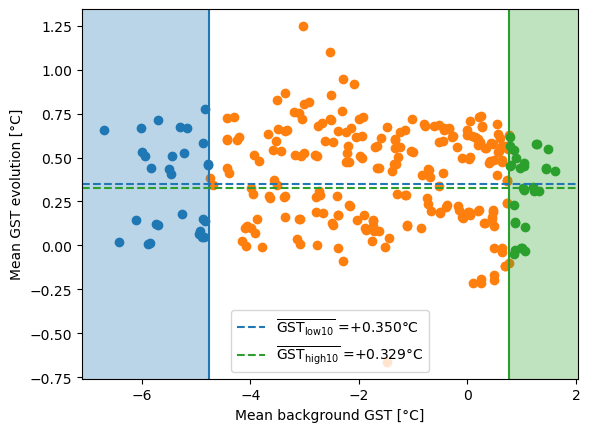

Plot of mean GST evolution vs background GST, fit, and binning per 10% quntiles
Succesfully opened the pre-existing pickle: df_Joffre_new.pkl
Succesfully opened the pre-existing pickle: reanalysis_stats_Joffre_new.pkl
Succesfully opened the pre-existing pickle: list_valid_sim_Joffre_new.pkl
Succesfully opened the pre-existing pickle: melt_out_Joffre_new.pkl
Succesfully opened the pre-existing pickle: df_stats_Joffre_new.pkl
R-square: 0.0024827831925045376 , regression slope: -0.006469360226258803 , regression intercept: 0.3827771933557186


/fs/yedoma/home/vpo001/VikScriptsTests/stat_summary_permafrost/evolution.py:69: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(list_x[low:up], list_y[low:up], c=color,s=0.8)
/fs/yedoma/home/vpo001/VikScriptsTests/stat_summary_permafrost/evolution.py:71: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(np.mean(list_x[low:up]), np.mean(list_y[low:up]), c=color, s=50)


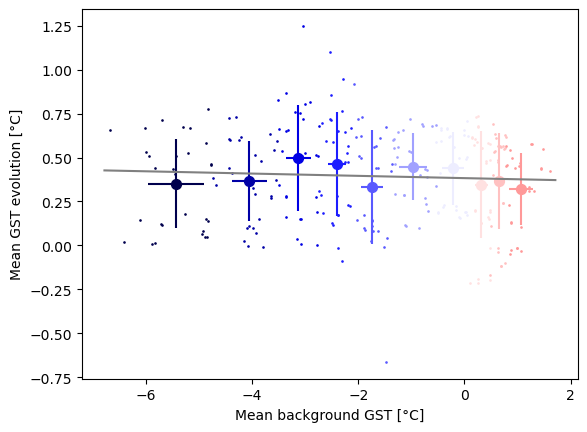

Scatter plot of mean background GST vs evolution of mean GST between the background and transient period
Succesfully opened the pre-existing pickle: df_Joffre_new.pkl
Succesfully opened the pre-existing pickle: reanalysis_stats_Joffre_new.pkl
Succesfully opened the pre-existing pickle: list_valid_sim_Joffre_new.pkl
Succesfully opened the pre-existing pickle: melt_out_Joffre_new.pkl
Succesfully opened the pre-existing pickle: df_stats_Joffre_new.pkl


/fs/yedoma/home/vpo001/.conda/envs/victorconda/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/fs/yedoma/home/vpo001/.conda/envs/victorconda/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/fs/yedoma/home/vpo001/.conda/envs/victorconda/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/fs/yedoma/home/vpo001/.conda/envs/victorconda/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


altitude: 2000 , R-square: 0.3433054005674654 , regression slope: -0.11829910563257305 , regression intercept: 0.4131407263465586
altitude: 2500 , R-square: 0.25571200013862094 , regression slope: -0.0969707023625326 , regression intercept: 0.2379434529339929
altitude: 3000 , R-square: 0.30669740262333894 , regression slope: -0.031782807582685396 , regression intercept: 0.23202744607780615


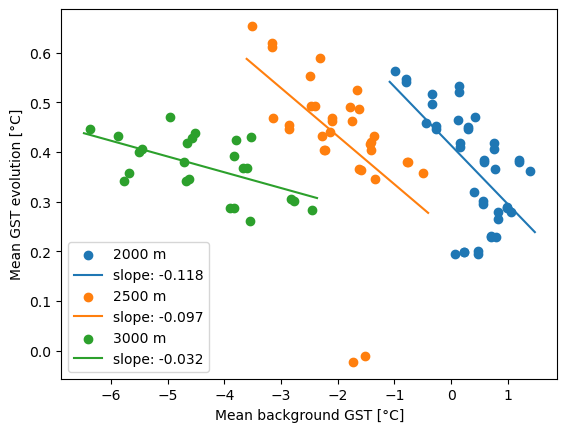

Parity plot (statistically-modeled vs numerically-simulated) of background mean GST:
Succesfully opened the pre-existing pickle: df_Joffre_new.pkl
Succesfully opened the pre-existing pickle: reanalysis_stats_Joffre_new.pkl
Succesfully opened the pre-existing pickle: list_valid_sim_Joffre_new.pkl
Succesfully opened the pre-existing pickle: melt_out_Joffre_new.pkl
Succesfully opened the pre-existing pickle: df_stats_Joffre_new.pkl


<Figure size 640x480 with 0 Axes>

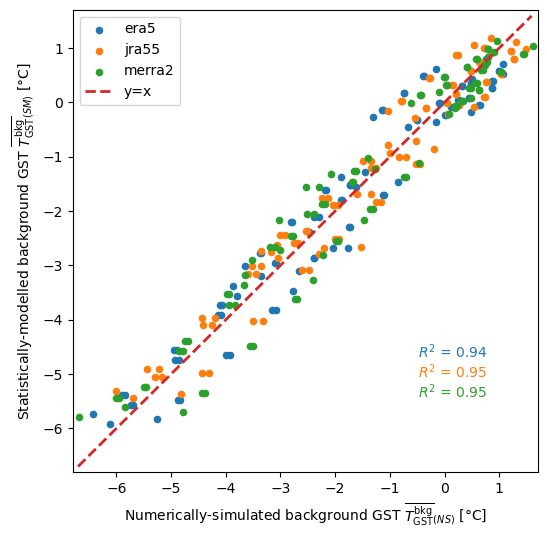

The coefficients of the statistical model for the mean background GST are given by:
  Coefficient         era5        jra55       merra2
0      offset    10.085020     9.610909    10.056621
1       c_alt    -0.004728    -0.004411    -0.005042
2       d_alt  1395.304119  1194.002240  1366.584497
3       c_asp    -0.000736    -0.000744    -0.000743
4     c_slope    -0.009204    -0.006841     0.009739
Plot of yearly statistics for atmospheric timeseries. Mean and several quantiles for each year:


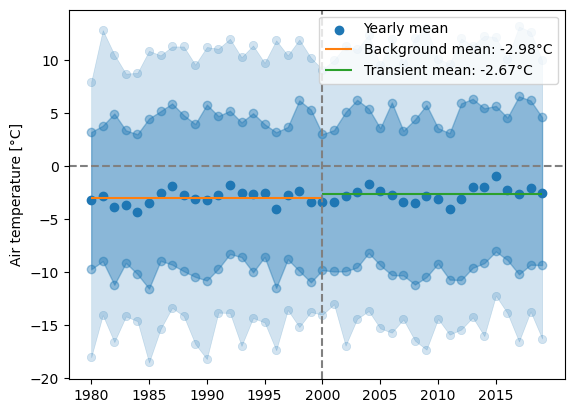

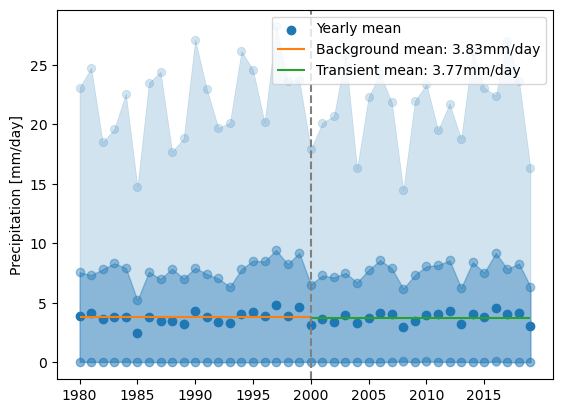

Plot of yearly statistics for simulated timeseries. Mean and several quantiles for each year:


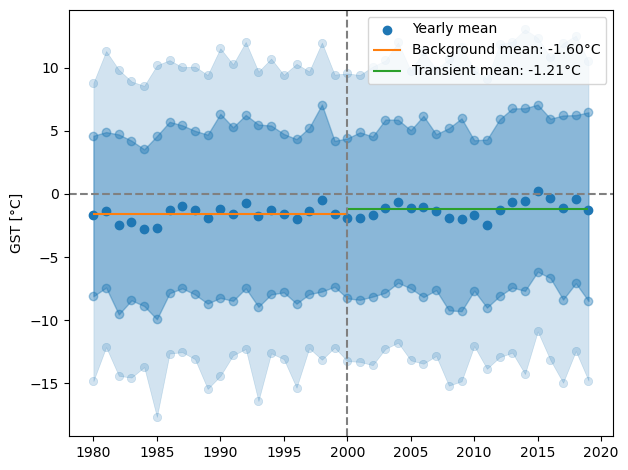

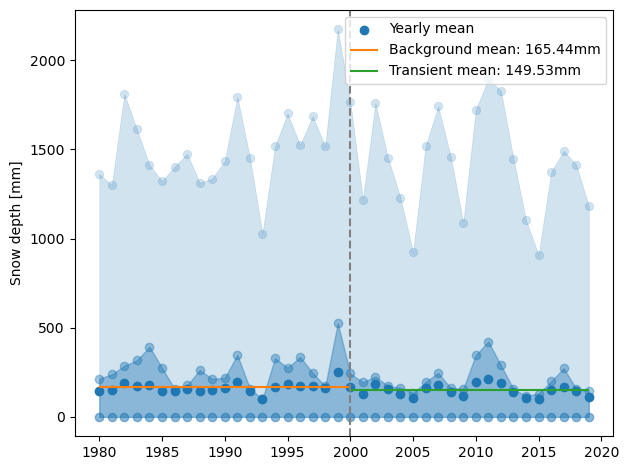

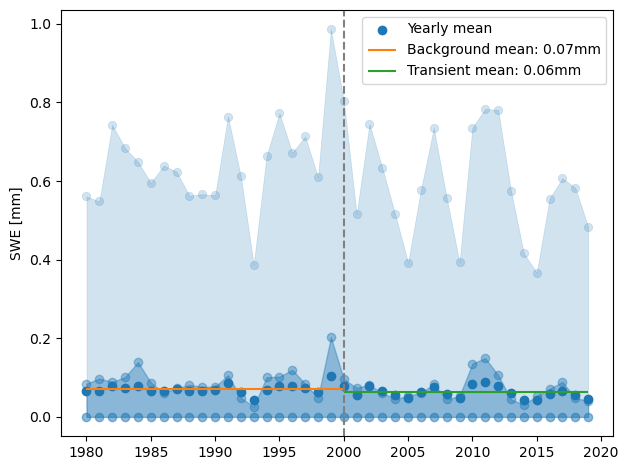

Histogram of the evolution of the snow cover (in days) and melt-out date:
Succesfully opened the pre-existing pickle: df_Joffre_new.pkl
Succesfully opened the pre-existing pickle: reanalysis_stats_Joffre_new.pkl
Succesfully opened the pre-existing pickle: list_valid_sim_Joffre_new.pkl
Succesfully opened the pre-existing pickle: melt_out_Joffre_new.pkl
Succesfully opened the pre-existing pickle: df_stats_Joffre_new.pkl


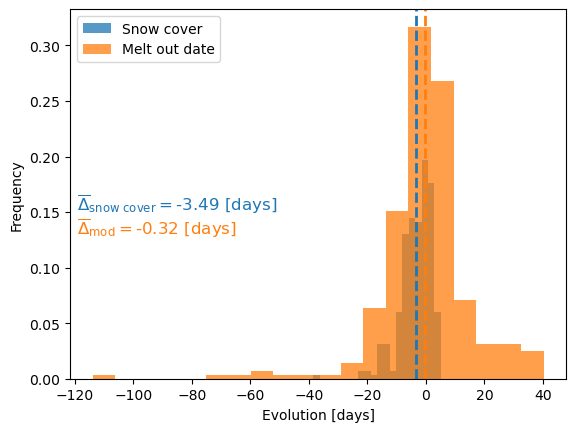

Plot of 2 timeseries reduced to a 1-year window with mean and 1- and 2-sigma spread:


<Figure size 640x480 with 0 Axes>

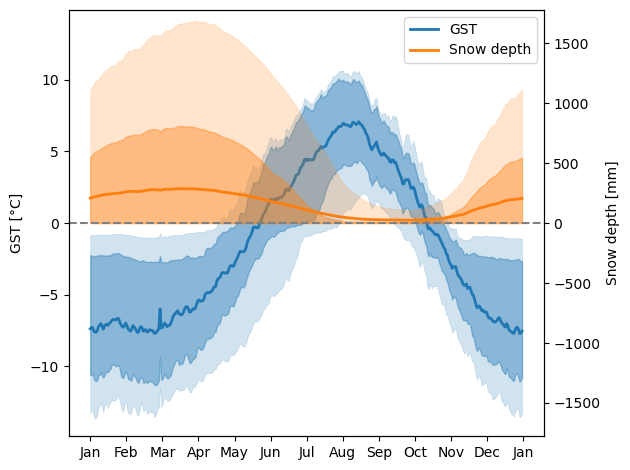

Plot of a single timeseries reduced to a 1-year window with mean and 1 and 2-sigma spread, for background and transient piods:


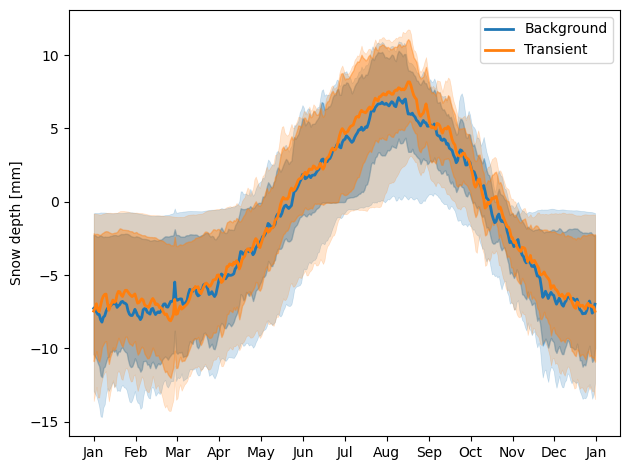

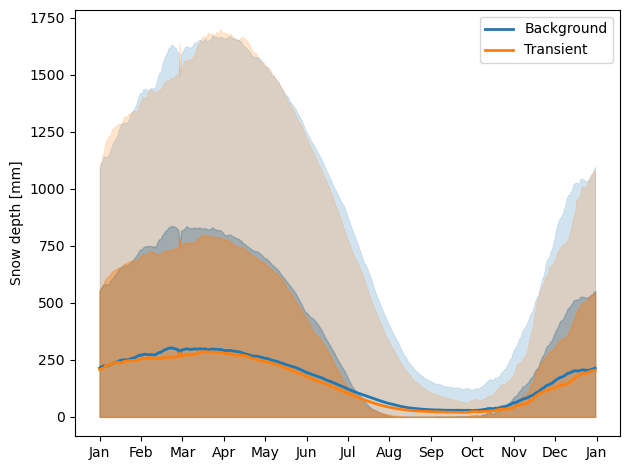

All done!


<Figure size 640x480 with 0 Axes>

In [5]:
plot_all(site, forcing_list, path_forcing_list, path_ground, path_snow, path_swe, path_thaw_depth,
         year_bkg_end, year_trans_end, no_weight=True,
         individual_heatmap=False, polar_plots=False, parity_plot=True)